**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
#Import required libraries for data management and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
#sanity checks on loaded dataframe
print(books.head(1).T)

print(ratings.head(1).T)

print(users.head(1).T)

                                                                   0
ISBN                                                      0195153448
bookTitle                                        Classical Mythology
bookAuthor                                        Mark P. O. Morford
yearOfPublication                                               2002
publisher                                    Oxford University Press
imageUrlS          http://images.amazon.com/images/P/0195153448.0...
imageUrlM          http://images.amazon.com/images/P/0195153448.0...
imageUrlL          http://images.amazon.com/images/P/0195153448.0...
                     0
userID          276725
ISBN        034545104X
bookRating           0
                           0
userID                     1
Location  nyc, new york, usa
Age                      NaN


### Check no.of records and features given in each dataset
hint - check shape

In [4]:
#Lets check the size and datatypes of each dataset
print("Shape of Books:",books.shape)

print("Shape of Ratings:",ratings.shape)

print("Shape of Users:",users.shape)


Shape of Books: (271360, 8)
Shape of Ratings: (1149780, 3)
Shape of Users: (278858, 3)


## Exploring books dataset

In [5]:
#Lets explore the books dataset characteristics
books.info()

#There are few missing values
#As expected all the columns are object data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


### Drop last three columns containing image URLs which will not be required for analysis

In [6]:
#Dropping image URL columns
books.drop(["imageUrlS","imageUrlM","imageUrlL"],axis=1,inplace=True)

In [7]:
#sanity check
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


**yearOfPublication**

### Check unique values of yearOfPublication


In [8]:
#Checking unique values of year of publication
books.yearOfPublication.unique()

#There are some zeros, publishers name etc

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [9]:
books[books["yearOfPublication"] == "DK Publishing Inc"]

#looks like data is captured wrongly

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [10]:
#Dropping the rows where publisher name is in year of publication
filter_list = ["DK Publishing Inc","Gallimard"]
drop_index = books[books["yearOfPublication"].isin(filter_list)].index
books.drop(index=drop_index,axis=0,inplace=True)

In [11]:
#sanity
books[books["yearOfPublication"].isin(filter_list)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [12]:
books["yearOfPublication"] = books["yearOfPublication"].astype("int")

In [13]:
#check datatypes for sanity
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


### Drop NaNs in `'publisher'` column


In [14]:
#Find missing values from publisher column and drop the rows
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [15]:
#Drop rows with NaN values in publisher
books.dropna(subset=["publisher"],inplace=True)

In [16]:
#check if rows got dropped
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            0
dtype: int64

## Exploring Users dataset

In [17]:
#Check the users dataset datatypes and general characteristics
users.info()

#Age is missing for lot of records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Get all unique values in ascending order for column `Age`

In [18]:
#Unique values of Age
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [19]:
#Replace the values with NaN based on the condition
users.where((users["Age"] >= 5) & (users["Age"] <= 90),inplace=True)

In [20]:
#check sanity
users["Age"].unique()

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12.,
       74., 75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,
        6., 84., 82., 90., 85., 86., 87., 89., 88.])

### Replace null values in column `Age` with mean

In [21]:
#Mean of the Age column
age_mean = round(users["Age"].mean())
age_mean

35

In [22]:
#Replace NaN with mean
users["Age"].fillna(age_mean,inplace=True)

In [23]:
#Sanity check on replacement
users["Age"].isna().sum()

0

### Change the datatype of `Age` to `int`

In [24]:
#Change Age datatype to int
users["Age"] = users["Age"].astype("int")

In [25]:
#Check the datatypes now
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      166784 non-null float64
Location    166784 non-null object
Age         278858 non-null int32
dtypes: float64(1), int32(1), object(1)
memory usage: 5.3+ MB


In [26]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [27]:
#Lets now explore ratings dataset
ratings.shape

(1149780, 3)

In [28]:
#Ratings and user id is numeric
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [29]:
#Check the ratings distribution
ratings.bookRating.value_counts()


0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [30]:
#Get the unique values of books in books dataset
ISBNfromBooks = list(books.ISBN.unique())

#Pick only the ratings of books which are available in books dataset
ratings = ratings[ratings["ISBN"].isin(ISBNfromBooks)]

In [31]:
#Check the current # of records
ratings.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [32]:
#Get the unique users available in users dataset
usersAvailable = users.userID.unique()

#pick only the ratings from users who are available in users dataset
ratings = ratings[ratings["userID"].isin(usersAvailable)]

In [33]:
#Check the current # of records
ratings.shape

(748318, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [34]:
#We will only consider the explicit ratings from users ie 1-10 and drop ratings with value 0
ratings = ratings[ratings["bookRating"] != 0]

In [35]:
#Check the current count of ratings and unique ratings values
ratings.shape

(267893, 3)

In [36]:
#Unique rating values
ratings.bookRating.unique()

array([ 3,  6,  9,  8,  7,  5, 10,  1,  4,  2], dtype=int64)

### Find out which rating has been given highest number of times

In [37]:
#Check ratings distribution now
ratings.bookRating.value_counts().sort_values()

#Rating 8 has been given maximum

1       870
2      1547
3      3295
4      5055
6     21309
5     27543
9     44970
7     45238
10    53681
8     64385
Name: bookRating, dtype: int64

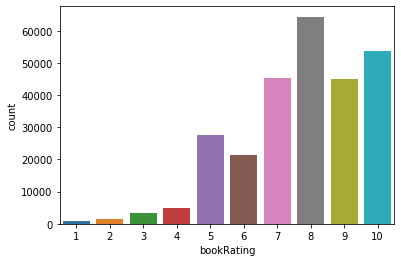

In [38]:
sns.countplot(ratings.bookRating)

In [39]:
#ratings['bookRating'].plot(kind = 'bar')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [71]:
#Lets check the ratings given by each user
userGroups = ratings.groupby(by="userID").count().reset_index()


In [76]:
#Extract only users who have given at least 100 ratings
relevantUsers = userGroups[userGroups["bookRating"] >= 100]["userID"]

In [80]:
#Extract ratings of of only the users who gave at least 100 ratings of books
ratings = ratings[ratings["userID"].isin(list(relevantUsers))]

In [81]:
#check the new count and columns
ratings.shape

(74331, 3)

In [86]:
#sanity on ratings
ratings.sample(5)

,userID,ISBN,bookRating
284164,67840,0380811790,9
308687,73681,9505115571,9
1063333,254206,0345333950,10
281562,66942,9837407875,7
1063509,254206,0812505506,10


### Transform data to surprise format

In [96]:
#Load surprise modules for data loading and model building

from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

#Initialize Reader for reading from pandas custom rating data.
#DF is of the form userId, Item ID and Rating
reader = Reader(rating_scale=(1, 10))

surprise_df = Dataset.load_from_df(ratings,reader)

In [97]:
#Initialize normal predictor for checking baseline accuracy
algo = NormalPredictor()

In [98]:
cross_validate(algo,surprise_df,cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3324  2.3195  2.3036  2.3231  2.2952  2.3148  0.0135  
MAE (testset)     1.8545  1.8367  1.8221  1.8389  1.8226  1.8349  0.0120  
Fit time          0.16    0.18    0.18    0.18    0.18    0.18    0.01    
Test time         0.70    0.19    0.22    0.18    0.19    0.30    0.20    


{'test_rmse': array([2.33239416, 2.31952299, 2.30363331, 2.32311914, 2.29520177]),
 'test_mae': array([1.85446364, 1.83669908, 1.82207171, 1.83887441, 1.82255947]),
 'fit_time': (0.16431331634521484,
  0.18462610244750977,
  0.1811811923980713,
  0.1750507354736328,
  0.17922186851501465),
 'test_time': (0.6982998847961426,
  0.18926692008972168,
  0.21933913230895996,
  0.18449163436889648,
  0.18745017051696777)}

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [99]:
#import surprise train_test_split
from surprise.model_selection import train_test_split

In [100]:
#We will assume 30% test data
trainset, testset = train_test_split(surprise_df, test_size=.25)

### Explore trainset and testset

In [104]:
#Lets explore the training set using inbuilt surprise functions

#No of unique users, ratings and iteme
print("No of unique users : ",trainset.n_users)
print("No of unique items : ",trainset.n_items)
print("No of unique ratings : ",trainset.n_ratings)

No of unique users :  353
No of unique items :  40307
No of unique ratings :  55748


In [105]:
#Rating scale
trainset.rating_scale

(1, 10)

In [106]:
#Check the mean ratings
trainset.global_mean

#Kind of expected since we knew 8 was the most common rating

8.031552701442203

In [119]:
#Lets explore the user ratings and item ratings tuples
trainset.ir[0]

[(0, 8.0), (144, 10.0), (297, 8.0)]

In [124]:
trainset.ur[0]

[(0, 8.0),
 (91, 5.0),
 (431, 6.0),
 (524, 9.0),
 (591, 7.0),
 (1155, 8.0),
 (1784, 7.0),
 (1791, 8.0),
 (2194, 6.0),
 (2295, 7.0),
 (3056, 6.0),
 (3738, 6.0),
 (4476, 8.0),
 (4799, 7.0),
 (5020, 8.0),
 (5057, 8.0),
 (5387, 5.0),
 (5491, 8.0),
 (5580, 8.0),
 (6016, 9.0),
 (6067, 7.0),
 (6460, 5.0),
 (6739, 8.0),
 (6799, 7.0),
 (8437, 9.0),
 (8898, 8.0),
 (7203, 8.0),
 (9156, 9.0),
 (10264, 9.0),
 (10346, 8.0),
 (532, 8.0),
 (10416, 7.0),
 (11127, 5.0),
 (11657, 5.0),
 (12233, 7.0),
 (12877, 6.0),
 (13388, 9.0),
 (13988, 6.0),
 (14338, 9.0),
 (15384, 6.0),
 (15634, 8.0),
 (16436, 6.0),
 (4932, 8.0),
 (16645, 8.0),
 (5358, 8.0),
 (16971, 6.0),
 (17385, 8.0),
 (17732, 7.0),
 (18685, 7.0),
 (19551, 6.0),
 (11485, 9.0),
 (19911, 8.0),
 (19932, 8.0),
 (20179, 7.0),
 (21166, 6.0),
 (21246, 8.0),
 (21262, 5.0),
 (21287, 8.0),
 (21456, 7.0),
 (16720, 8.0),
 (7278, 8.0),
 (2427, 6.0),
 (22645, 6.0),
 (15671, 8.0),
 (23391, 8.0),
 (23912, 7.0),
 (24000, 6.0),
 (24082, 5.0),
 (1940, 8.0),
 (1222, 

### Import SVD from Surprise and for on trainset

In [125]:
from surprise import SVD
from surprise import accuracy

In [127]:
#Initialize SVD
sv = SVD()

#Fit using training dataset
sv.fit(trainset)

### Predict ratings for testset and check RMSE

In [128]:
#Lets use this on the test data set to get predictions
predictions = sv.test(testset)

#RMSE
accuracy.rmse(predictions)

RMSE: 1.4381


1.4380861616421836

### Generating top n recommendations for a user

In [137]:
##Example code from surprise package
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [132]:
#Train on full data set available
trainset = surprise_df.build_full_trainset()

In [133]:
#Fit
sv.fit(trainset)

In [134]:
#Test set - all pairs not in the trainset
testset = trainset.build_anti_testset()

In [135]:
#Get predictions
predictions = sv.test(testset)

In [138]:
#Get the top predictions for each user
top_n = get_top_n(predictions, n=10)

In [184]:
#Lets check some of the recommendations of a random user
user = ratings.sample(1).userID.values[0]
user

13850

In [191]:
#Get the recommendations for this selected user
user_reco_df = pd.DataFrame(top_n[user],columns=["ISBN","Est. Rating"])

In [198]:
user_reco_df

,ISBN,Est. Rating
0,0439139597,10.000000
1,0451188454,10.000000
2,0385421982,9.982963
3,0394823370,9.972585
4,0439136350,9.927768
5,059035342X,9.927546
6,0394868838,9.923452
7,0140146598,9.905944
8,0425103285,9.893368
9,0821211226,9.890206


In [210]:
#Merge with books to get the book Title
user_reco_df = pd.merge(user_reco_df,books[["ISBN","bookTitle"]],left_on="ISBN",right_on="ISBN")

In [211]:
#Recommendations
user_reco_df

,ISBN,Est. Rating,bookTitle
0,0439139597,10.000000,Harry Potter and the Goblet of Fire (Book 4)
1,0451188454,10.000000,The Bone Collector (Lincoln Rhyme Novels (Pape...
2,0385421982,9.982963,The Pelican Brief
3,0394823370,9.972585,The Lorax
4,0439136350,9.927768,Harry Potter and the Prisoner of Azkaban (Book 3)
5,059035342X,9.927546,Harry Potter and the Sorcerer's Stone (Harry P...
6,0394868838,9.923452,The Berenstain Bears and the Dinosaurs
7,0140146598,9.905944,"The Third Revolution: Population, Environment,..."
8,0425103285,9.893368,Mrs. Mike
9,0821211226,9.890206,Portfolios of Ansel Adams
